In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot
import seaborn as sns
import folium

In [2]:
data = pd.read_csv("C:/Users/User/Desktop/ProjectHotel/Hotel_Reviews.csv")

In [3]:
data.head(2)

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968

In [4]:
data.shape

(515738, 17)

Basic Visualizations

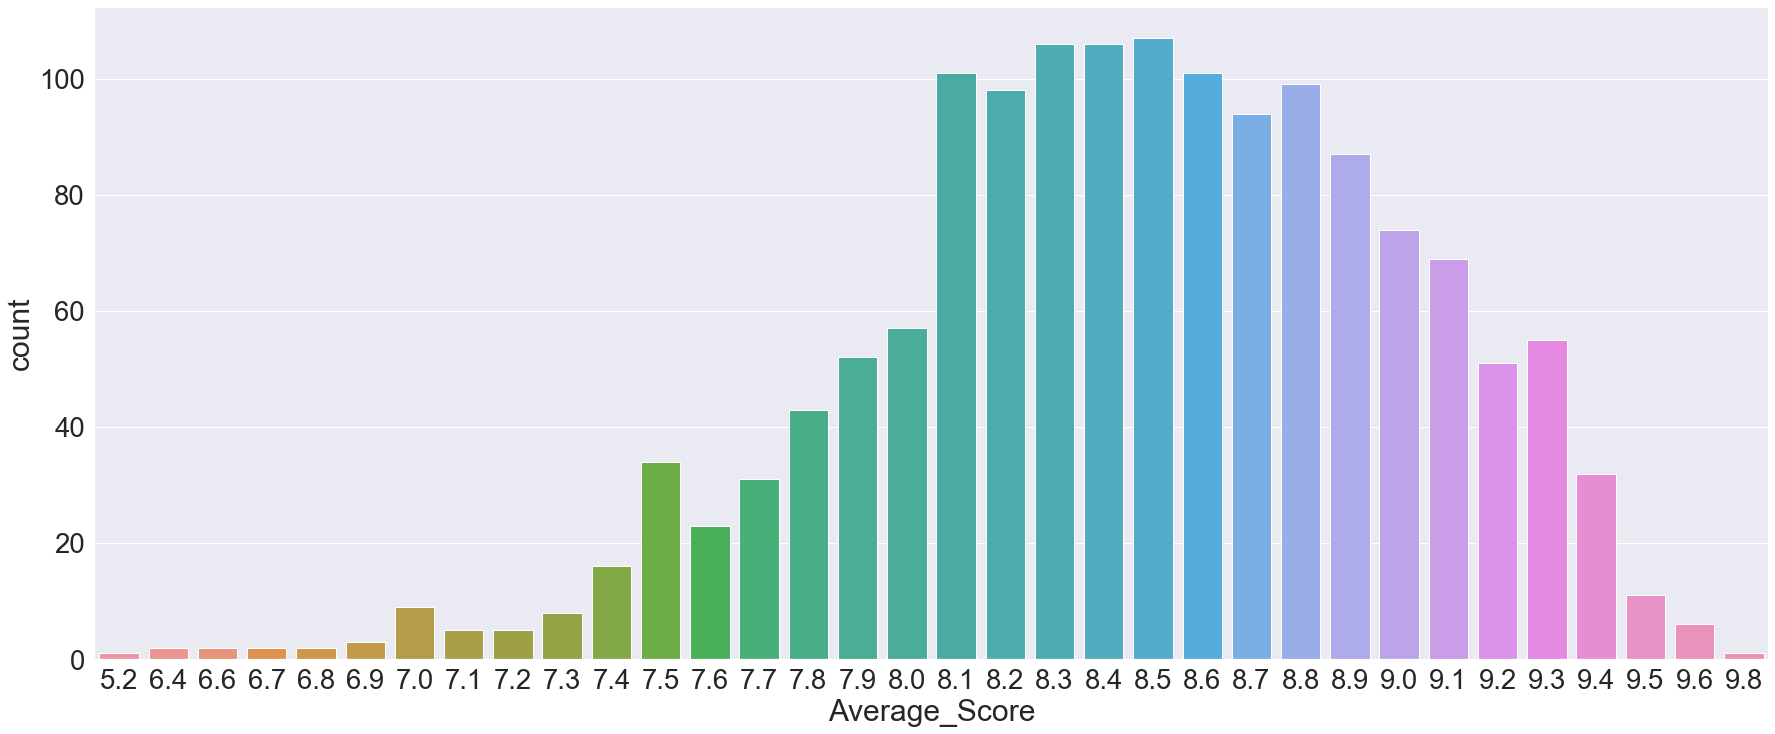

In [5]:
data_plot = data[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)

In [6]:
Reviewer_Nat_Count = data.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])
data.Reviewer_Nationality.describe()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
Name: Reviewer_Nationality, dtype: int64


count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: Reviewer_Nationality, dtype: object

In [8]:
Review_Date_count = data.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

In [9]:
temp_data = data.drop_duplicates(['Hotel_Name'])
len(temp_data)

1492

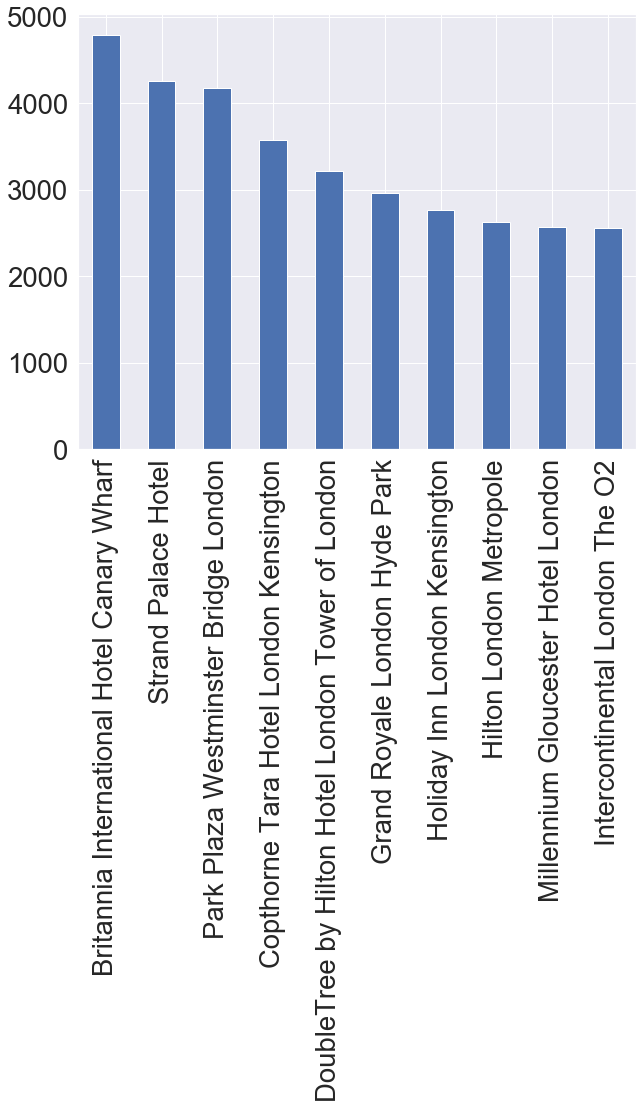

In [10]:
Hotel_Name_count = data.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(10,8))

In [11]:
data['pos_count']=0
data['neg_count']=0

In [12]:
data['Negative_Review']=[x.lower().strip() for x in data['Negative_Review']]
data['Positive_Review']=[x.lower().strip() for x in data['Positive_Review']]

In [13]:
data["neg_count"] = data.apply(lambda x: 1 if x["Positive_Review"] == 'no positive' or \
                           x['Positive_Review']=='nothing' or \
                           x['Negative_Review']=='everything' \
                           else x['pos_count'],axis = 1)

In [14]:
data["pos_count"] = data.apply(lambda x: 1 if x["Negative_Review"] == 'no negative' or \
                           x['Negative_Review']=='nothing' or \
                           x['Positive_Review']=='everything' \
                           else x['pos_count'],axis = 1)

In [15]:
reviews = pd.DataFrame(data.groupby(["Hotel_Name"])["pos_count","neg_count"].sum())
reviews["total"] = reviews["pos_count"] + reviews["neg_count"]
reviews["pos_ratio"] = reviews["pos_count"].astype("float")/reviews["total"].astype("float")
reviews
pos = reviews.sort_values(by = "pos_ratio",ascending=False)
pos.head(10)

pos_count  neg_count  total  pos_ratio
Hotel_Name                                                              
Hotel Georgette                          18          0     18        1.0
Hotel Tocq                               10          0     10        1.0
Hotel Gallitzinberg                       2          0      2        1.0
Hotel Le Six                             34          0     34        1.0
Room Mate Gerard                          6          0      6        1.0
Milestone Hotel Kensington               43          0     43        1.0
MiHotel                                   4          0      4        1.0
Hotel Astra Opera Astotel                10          0     10        1.0
Hotel Arkadenhof                         12          0     12        1.0
The Zetter Townhouse Clerkenwell         14          0     14        1.0

Spacy

In [16]:
 import spacy

In [17]:
nlp = spacy.load('en_core_web_sm')

In [18]:
 data['ReviewCombined'] = data['Negative_Review']+data['Positive_Review']

In [19]:
data.head(1)

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia   i am so angry that i made this post available ...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   

                                    Positive_Review  \
0  only the park outside of the hotel was beautiful   

   Review_Total_Positive_Word_Counts  \
0                                 11   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   

         lat       lng  pos_count  neg_count  \
0  52.360576  4.915968          0          0   

                                      ReviewCombined  
0  i am so angry that i made this post available ...

In [20]:
data_sample = data.sample(n=1000, random_state = 1)
len(data_sample)
data_sample.head(2)

Hotel_Address  \
356054  Keizersgracht 148 Amsterdam City Center 1015 C...   
395957  Park Lane Westminster Borough London W1K 7TN U...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
356054                            85  11/29/2015            9.3   
395957                           184   2/17/2017            7.9   

                                 Hotel_Name        Reviewer_Nationality  \
356054                          Canal House             United Kingdom    
395957  Grosvenor House A JW Marriott Hotel   United States of America    

                                          Negative_Review  \
356054                                        no negative   
395957  i had a junior suite the bed was only a queen ...   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
356054                                  0                      491   
395957                                 21                      564   

                                          Positive_Review  \
356054  nothing was too much trouble the staff were at...   
395957  i loved there shower it felt like you were und...   

        Review_Total_Positive_Word_Counts  \
356054                                 23   
395957                                 17   

        Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
356054                                           2            10.0   
395957                                           5            10.0   

                                                     Tags days_since_review  \
356054  [' Leisure trip ', ' Couple ', ' Deluxe Double...           613 day   
395957  [' Leisure trip ', ' Couple ', ' Deluxe Suite ...           167 day   

              lat       lng  pos_count  neg_count  \
356054  52.376310  4.886270          1          0   
395957  51.508202 -0.154559          0          0   

                                           ReviewCombined  
356054  no negativenothing was too much trouble the st...  
395957  i had a junior suite the bed was only a queen ...

In [22]:
doc = nlp(data_sample['ReviewCombined'][356054])
pos = pd.DataFrame()

for token in doc:
    pos.loc[token, "pos"] = token.pos
    pos.loc[token, "pos_"] = token.pos_
    pos.loc[token, "explained"] = spacy.explain(token.pos_)

pos

pos   pos_                 explained
no                90.0    DET                determiner
negativenothing   92.0   NOUN                      noun
was               87.0    AUX                 auxiliary
too               86.0    ADV                    adverb
much              84.0    ADJ                 adjective
trouble           92.0   NOUN                      noun
the               90.0    DET                determiner
staff             92.0   NOUN                      noun
were              87.0    AUX                 auxiliary
attentive         84.0    ADJ                 adjective
at                85.0    ADP                adposition
all               90.0    DET                determiner
times             92.0   NOUN                      noun
and               89.0  CCONJ  coordinating conjunction
the               90.0    DET                determiner
hotel             92.0   NOUN                      noun
staff             92.0   NOUN                      noun
made             100.0   VERB                      verb
the               90.0    DET                determiner
stay              92.0   NOUN                      noun
very              86.0    ADV                    adverb
comfortable       84.0    ADJ                 adjective

In [26]:
doc = nlp(data_sample['ReviewCombined'][356054])

named_entities = pd.DataFrame()

for ent in doc.ents:
    named_entities.loc[ent.text, "ent.start_char"] = ent.start_char
    named_entities.loc[ent.text, "ent.end_char"] = ent.end_char
    named_entities.loc[ent.text, "ent.label_"] = ent.label_
    
named_entities

Empty DataFrame
Columns: []
Index: []

In [27]:
named_entities = pd.DataFrame()

for token in doc:
    named_entities.loc[token,"ent_iob_"] = token.ent_iob_
    named_entities.loc[token,"ent_type_"] = token.ent_type_
    
named_entities

ent_iob_ ent_type_
no                     O          
negativenothing        O          
was                    O          
too                    O          
much                   O          
trouble                O          
the                    O          
staff                  O          
were                   O          
attentive              O          
at                     O          
all                    O          
times                  O          
and                    O          
the                    O          
hotel                  O          
staff                  O          
made                   O          
the                    O          
stay                   O          
very                   O          
comfortable            O

In [28]:
doc = nlp(data_sample['ReviewCombined'][356054])

dependencies = pd.DataFrame()

for token in doc:
    dependencies.loc[token,"dep_"] = token.dep_
    dependencies.loc[token,"head.text"] = token.head.text
    dependencies.loc[token,"head.pos_"] = token.head.pos_
    dependencies.at[token,"children"] = ', '.join(map(str, [child for child in token.children]))    
    
dependencies

dep_        head.text head.pos_  \
no                    det  negativenothing      NOUN   
negativenothing     nsubj              was       AUX   
was                  ROOT              was       AUX   
too                advmod             much       ADJ   
much                 amod          trouble      NOUN   
trouble              attr              was       AUX   
the                   det            staff      NOUN   
staff               nsubj             were       AUX   
were                relcl          trouble      NOUN   
attentive           acomp             were       AUX   
at                   prep             were       AUX   
all                   det            times      NOUN   
times                pobj               at       ADP   
and                    cc              was       AUX   
the                   det            staff      NOUN   
hotel            compound            staff      NOUN   
staff               nsubj             made      VERB   
made                 conj              was       AUX   
the                   det             stay      NOUN   
stay                nsubj      comfortable       ADJ   
very               advmod      comfortable       ADJ   
comfortable         ccomp             made      VERB   

                                            children  
no                                                    
negativenothing                                   no  
was              negativenothing, trouble, and, made  
too                                                   
much                                             too  
trouble                                   much, were  
the                                                   
staff                                            the  
were                            staff, attentive, at  
attentive                                             
at                                             times  
all                                                   
times                                            all  
and                                                   
the                                                   
hotel                                                 
staff                                     the, hotel  
made                              staff, comfortable  
the                                                   
stay                                             the  
very                                                  
comfortable                               stay, very

In [29]:
doc = nlp(data_sample['ReviewCombined'][356054])

vectors = pd.DataFrame()
for token in doc:
    vectors.loc[token,"has_vector"] = token.has_vector
    vectors.loc[token,"vector_norm"] = token.vector_norm
    vectors.loc[token,"is_oov"] = token.is_oov    
vectors

has_vector  vector_norm  is_oov
no                     True    24.070696    True
negativenothing        True    22.128986    True
was                    True    24.717377    True
too                    True    26.480970    True
much                   True    24.470964    True
trouble                True    21.243307    True
the                    True    21.571630    True
staff                  True    20.096970    True
were                   True    26.487799    True
attentive              True    21.637344    True
at                     True    22.147245    True
all                    True    21.756210    True
times                  True    22.151035    True
and                    True    22.110777    True
the                    True    23.320543    True
hotel                  True    18.178608    True
staff                  True    22.322388    True
made                   True    22.902782    True
the                    True    20.049763    True
stay                   True    22.115395    True
very                   True    27.031403    True
comfortable            True    25.098385    True

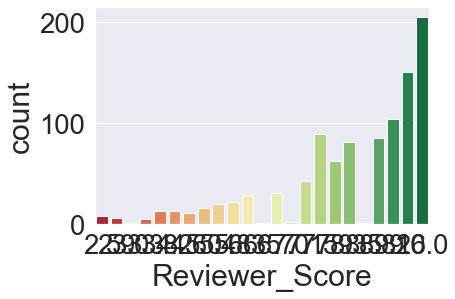

In [30]:
sns.countplot(x="Reviewer_Score", data=data_sample, palette="RdYlGn")

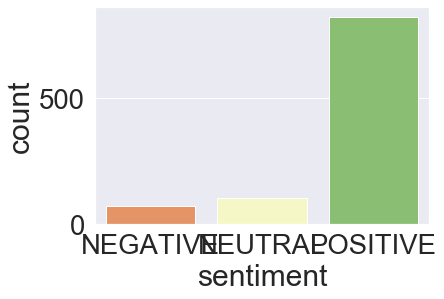

In [31]:
data_sample["sentiment"] = pd.cut(data_sample["Reviewer_Score"], 
                   bins=[2,5,7,10], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
sns.countplot(x="sentiment", data=data_sample, palette="RdYlGn")

In [32]:
data_sample.sentiment.dtype

CategoricalDtype(categories=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], ordered=True)

In [33]:
data_sample.groupby("sentiment").count()

Hotel_Address  Additional_Number_of_Scoring  Review_Date  \
sentiment                                                             
NEGATIVE              73                            73           73   
NEUTRAL              105                           105          105   
POSITIVE             822                           822          822   

           Average_Score  Hotel_Name  Reviewer_Nationality  Negative_Review  \
sentiment                                                                     
NEGATIVE              73          73                    73               73   
NEUTRAL              105         105                   105              105   
POSITIVE             822         822                   822              822   

           Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
sentiment                                                               
NEGATIVE                                  73                       73   
NEUTRAL                                  105                      105   
POSITIVE                                 822                      822   

           Positive_Review  Review_Total_Positive_Word_Counts  \
sentiment                                                       
NEGATIVE                73                                 73   
NEUTRAL                105                                105   
POSITIVE               822                                822   

           Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  Tags  \
sentiment                                                                     
NEGATIVE                                           73              73    73   
NEUTRAL                                           105             105   105   
POSITIVE                                          822             822   822   

           days_since_review  lat  lng  pos_count  neg_count  ReviewCombined  
sentiment                                                                     
NEGATIVE                  73   73   73         73         73              73  
NEUTRAL                  105  104  104        105        105             105  
POSITIVE                 822  818  818        822        822             822

In [34]:
data_sample[data_sample.sentiment == "NEUTRAL"]

Hotel_Address  \
468352    Ungargasse 60 03 Landstra e 1030 Vienna Austria   
266680  Aldwych Westminster Borough London WC2B 4DD Un...   
322919  F hrichgasse 10 01 Innere Stadt 1010 Vienna Au...   
175109  4 Broad Court Bow Street Covent Garden Westmin...   
126693  265 Rotherhithe Street Southwark London SE16 5...   
26922   101 Buckingham Palace Road Westminster Borough...   
160719  354 Queenstown Road Battersea London SW8 4AE U...   
5624    1 Addington Street Lambeth London SE1 7RY Unit...   
490390  Via Silvio Pellico 8 Milan City Center 20121 M...   
93461   2 Wallenberg Place Westminster Borough London ...   
70808   17 Nottingham Place Westminster Borough London...   
381739  Moll de Barcelona WTC Ciutat Vella 08039 Barce...   
210222  53 59 Kilburn High Road Maida Vale London Camd...   
177853   4 rue de la P pini re 8th arr 75008 Paris France   
56007   15 Seymour Street Westminster Borough London W...   
453332  Sonnenhofgasse 8 10 05 Margareten 1050 Vienna ...   
185083  41 54 Buckingham Gate Westminster Borough Lond...   
123545  26 28 Trebovir Rd Kensington and Chelsea Londo...   
182679  41 43 Brook Street Westminster Borough London ...   
360882  La Rambla 22 24 Ciutat Vella 08002 Barcelona S...   
442936  Scarsdale Place Kensington Kensington and Chel...   
295239  Carburton Street Westminster Borough London W1...   
68369   163 Marsh Wall Docklands Tower Hamlets London ...   
462565  Stadhouderskade 7 Oud West 1054 ES Amsterdam N...   
329973        Gran Via 559 Eixample 08012 Barcelona Spain   
67324   163 Marsh Wall Docklands Tower Hamlets London ...   
471932  Via Baracchini 12 Milan City Center 20123 Mila...   
295647   Cardenal Reig 11 Les Corts 08028 Barcelona Spain   
145118  31 34 Queen s Gate Kensington and Chelsea Lond...   
66507   163 Marsh Wall Docklands Tower Hamlets London ...   
...                                                   ...   
431003  Roelof Hartstraat 1 Oud Zuid 1071 VE Amsterdam...   
230449  68 86 Cromwell Road Kensington Kensington and ...   
262770  97 Cromwell Road Kensington and Chelsea London...   
139699  30 John Islip St Westminster Borough London SW...   
102316  202 220 Cromwell Road Kensington and Chelsea L...   
330791        Gran Via 605 Eixample 08007 Barcelona Spain   
504652  Westminster Bridge Road Lambeth London SE1 7UT...   
226304  626 Chiswick High St Chiswick London W4 5RY Un...   
29328   104 Bayswater Rd Westminster Borough London W2...   
38081   12 boulevard Malesherbes 8th arr 75008 Paris F...   
404569  Piazza della Repubblica 20 Central Station 201...   
330174        Gran Via 605 Eixample 08007 Barcelona Spain   
363792  Lancaster Gate Westminster Borough London W2 3...   
85335   2 5 Montague Street Bloomsbury Camden London W...   
463159  Strand Westminster Borough London WC2R 0EU Uni...   
52472   146 Praed Street Westminster Borough London W2...   
401743  Passeig del Taulat 262 264 Sant Mart 08019 Bar...   
32733   11 13 Bayley Street Bedford Square Camden Lond...   
194599  49 53 New Road Tower Hamlets London E1 1HH Uni...   
355537  Kattengat 1 Amsterdam City Center 1012 SZ Amst...   
64878   163 Marsh Wall Docklands Tower Hamlets London ...   
513334  Wrights Lane Kensington and Chelsea London W8 ...   
172975  4 18 Harrington Gardens Kensington and Chelsea...   
133787  3 Berkeley Street Westminster Borough London W...   
285878         Bergara 2 4 Eixample 08002 Barcelona Spain   
512167  Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...   
138432  30 32 Boulevard Poissonni re 9th arr 75009 Par...   
46482   130 Tottenham Court Road Camden London W1T 5AY...   
6815    1 Addington Street Lambeth London SE1 7RY Unit...   
293154  Calle K s n Entrada principal Mercabarna Sants...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
468352                           116   2/13/2017            8.1   
266680                           409    8/2/2017            8.4   
322919                           155  12/15/2015            

In [35]:
indicies_to_drop = data_sample[data_sample.sentiment == "NEUTRAL"].index

indicies_to_drop

Int64Index([468352, 266680, 322919, 175109, 126693,  26922, 160719,   5624,
            490390,  93461,
            ...
             64878, 513334, 172975, 133787, 285878, 512167, 138432,  46482,
              6815, 293154],
           dtype='int64', length=105)

In [36]:
data_dropped = data_sample.drop(indicies_to_drop)

data_dropped.groupby("sentiment").count()

Hotel_Address  Additional_Number_of_Scoring  Review_Date  \
sentiment                                                             
NEGATIVE              73                            73           73   
NEUTRAL                0                             0            0   
POSITIVE             822                           822          822   

           Average_Score  Hotel_Name  Reviewer_Nationality  Negative_Review  \
sentiment                                                                     
NEGATIVE              73          73                    73               73   
NEUTRAL                0           0                     0                0   
POSITIVE             822         822                   822              822   

           Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
sentiment                                                               
NEGATIVE                                  73                       73   
NEUTRAL                                    0                        0   
POSITIVE                                 822                      822   

           Positive_Review  Review_Total_Positive_Word_Counts  \
sentiment                                                       
NEGATIVE                73                                 73   
NEUTRAL                  0                                  0   
POSITIVE               822                                822   

           Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  Tags  \
sentiment                                                                     
NEGATIVE                                           73              73    73   
NEUTRAL                                             0               0     0   
POSITIVE                                          822             822   822   

           days_since_review  lat  lng  pos_count  neg_count  ReviewCombined  
sentiment                                                                     
NEGATIVE                  73   73   73         73         73              73  
NEUTRAL                    0    0    0          0          0               0  
POSITIVE                 822  818  818        822        822             822

CategoricalDtype(categories=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], ordered=True)

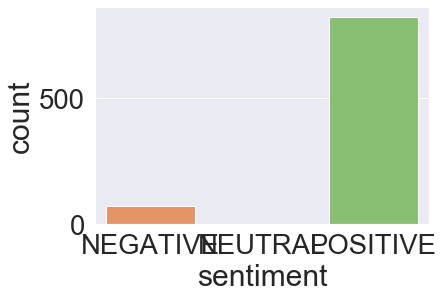

In [37]:
data_sample.sentiment = data_sample.sentiment.cat.remove_unused_categories()
sns.countplot(x="sentiment", data=data_dropped, palette="RdYlGn")
data_sample.sentiment.dtype

In [38]:
df_neg = data_sample[data_sample.sentiment=="NEGATIVE"]
df_pos = data_sample[data_sample.sentiment=="POSITIVE"]

In [39]:
data_sample["cats"] = [{"POSITIVE": y=="POSITIVE", "NEGATIVE": y=="NEGATIVE"} for y in data_sample.sentiment]

In [40]:
split = 0.8
split_row = int(len(data_sample) * split)
split_row

800

In [41]:
df_test = data_sample[split_row:]

len(df_test)

200

In [42]:
df_train = data_sample[:split_row]

len(df_train)

800

In [43]:
train_data = list(zip(df_train["ReviewCombined"], [{"cats": cats} for cats in df_train["cats"]]))
test_data = list(zip(df_test["ReviewCombined"], [{"cats": cats} for cats in df_test["cats"]]))

train_data[:3]

[('no negativenothing was too much trouble the staff were attentive at all times and the hotel staff made the stay very comfortable',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}),
 ('i had a junior suite the bed was only a queen size my brother got a king in hisi loved there shower it felt like you were under a fire hose great hotel',
  {'cats': {'POSITIVE': True, 'NEGATIVE': False}}),
 ('staff could be less rude the pool area is horriblebeds really comfy and the location is great also maid was such a sweetheart',
  {'cats': {'POSITIVE': False, 'NEGATIVE': False}})]

In [44]:
textcat = nlp.create_pipe("textcat",
                          config={"exclusive_classes": True,
                                  "architecture": "simple_cnn"})

In [45]:
nlp.add_pipe(textcat, last=True)

In [46]:
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

textcat.labels # výpis pro ověření

('POSITIVE', 'NEGATIVE')

In [47]:
from spacy.util import minibatch, compounding

In [48]:
batch_sizes = compounding(1.0, 32.0, 1.5)
for x in range(12): print(next(batch_sizes))

1.0
1.5
2.25
3.375
5.0625
7.59375
11.390625
17.0859375
25.62890625
32.0
32.0
32.0


In [49]:
batch_sizes = compounding(1.0, 4.0, 1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [('i had a junior suite the bed was only a queen size my brother got a king in hisi loved there shower it felt like you were under a fire hose great hotel', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]

batch: 1 [('staff could be less rude the pool area is horriblebeds really comfy and the location is great also maid was such a sweetheart', {'cats': {'POSITIVE': False, 'NEGATIVE': False}})]

batch: 2 [('no negativereally nice hotel good facilities great staff and very clean only minor issue was temperature of main pool would definitely recommend though', {'cats': {'POSITIVE': True, 'NEGATIVE': False}}), ('no negativeeverything is super and room and design very clean super', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]


In [50]:
from sklearn import metrics # funkce pro skóring
import matplotlib.pyplot as plt # pro přístup k zobrazování grafu v iteracích
import numpy as np # numpy pro generování náhodných čísel

In [51]:
y = df_test["sentiment"] # ["POSITIVE", "NEGATIVE", "POSITIVE", "NEGATIVE", ...]
random_scores = np.random.rand(len(df_test.sentiment)) # náhodné skóre od 0 (NEGATIVE) do 1 (POSITIVE)

fpr, tpr, thresholds = metrics.roc_curve(y, random_scores, pos_label="POSITIVE") # kalkulace ROC

In [52]:
metrics.auc(fpr, tpr)

0.526436342813514

In [53]:
plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
plot.set(xlabel='False Positive', ylabel='True Positive')

[Text(0, 0.5, 'True Positive'), Text(0.5, 0, 'False Positive')]

In [54]:
pipe_exceptions = ["textcat"] #, "trf_wordpiecer", "trf_tok2vec"
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
n_iter=50
import random
dropout = 0.7

In [55]:
score = pd.DataFrame() # dataframe pro výsledky
print("trénink", end="") # začátek tisku průběhu na řádek

with nlp.disable_pipes(other_pipes):  # s dočasně vypnutými ostatními pipes
    
    optimizer = nlp.begin_training() # vytvoření optimalizátoru    
    
    for i in range(n_iter): # iterace přes celou tréninkovou množinu (epocha)
        print(".", end="") # tisk průběhu další iterace na řádek
        losses = {} # příprava pro ukládání informací o ztrátách        
        random.shuffle(train_data) # zamíchání tréninkovou množinou
        
        batch_sizes = compounding(8.0, 40.0, 1.2) # inicializace počtu příkladů ve várkách
        batches = minibatch(train_data, size=batch_sizes) # načtení příkladů ve várkách
        
        for batch in batches: # učení se na každé várce 
            texts, annotations = zip(*batch) # uložení polí dvojic do dvou separátních polí
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) # samotné učení
        
        with textcat.model.use_params(optimizer.averages): # s dočasnou aplikací aktualizovaného modelu
            scorer = nlp.evaluate(test_data) # evaluace modelu na testovacích datech
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i, "loss"] = losses["textcat"] # zapsání končené ztráty do tabulky
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["POSITIVE"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["POSITIVE"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["POSITIVE"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["NEGATIVE"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["NEGATIVE"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["NEGATIVE"]["f"]
            
            #alternativní skórování pomocí ROC a balíčku sklearn
            docs_generator = nlp.pipe(df_test["ReviewCombined"]) # dávkové zpracování testovacích dokumentů
            docs = list(docs_generator) # načtení testovacích dokumentů do listu
            scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu
            
            # kalkulace ROC
            fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                                     y_score = scores, 
                                                     pos_label = "POSITIVE")
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i,"AUC"] = metrics.auc(fpr, tpr)
            
score #zobrazení tabulky se skóre po celém učení

trénink..................................................

loss          F    P+     R+         F+   P-   R-   F-       AUC
0   0.028721  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.784310
1   0.015304  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.801107
2   0.016865  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.799389
3   0.012796  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.795953
4   0.017831  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.800344
5   0.013760  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.810460
6   0.011477  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.791372
7   0.013029  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.781829
8   0.015817  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.780874
9   0.009818  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.768467
10  0.010485  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.762264
11  0.014889  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.749380
12  0.014081  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.741935
13  0.013306  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.742126
14  0.017239  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.745467
15  0.012926  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.728383
16  0.016097  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.671502
17  0.011805  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.637908
18  0.013287  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.595533
19  0.021790  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.530445
20  0.013055  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.479099
21  0.015345  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.471750
22  0.011110  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.554591
23  0.013469  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.540370
24  0.011577  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.447891
25  0.014476  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.430807
26  0.012916  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.480340
27  0.015637  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.531685
28  0.014462  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.554781
29  0.017329  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.535885
30  0.023932  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.509926
31  0.019169  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.464020
32  0.014521  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.487307
33  0.014203  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.465356
34  0.013848  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.484062
35  0.016858  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.450659
36  0.010478  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.426990
37  0.016091  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.445505
38  0.019712  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.452854
39  0.018381  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.462779
40  0.012842  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.439111
41  0.015712  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.413915
42  0.022032  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.351117
43  0.016244  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.305020
44  0.016205  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.293281
45  0.016497  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.351880
46  0.017522  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.316377
47  0.022260  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.301775
48  0.013876  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.330216
49  0.016194  48.453608  94.0  100.0  96.907216  0.0  0.0  0.0  0.356270

In [56]:
#alternativní skórování pomocí ROC a balíčku sklearn
docs_generator = nlp.pipe(df_test["ReviewCombined"]) # dávkové zpracování testovacích dokumentů
docs = list(docs_generator) # načtení testovacích dokumentů do listu
scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu

# kalkulace ROC
fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                         y_score = scores, 
                                         pos_label = "POSITIVE")

# zobrazení ROC grafu
roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
roc_plot.set(xlabel='False Positive', ylabel='True Positive')
plt.show() # zobrazení křivky za běhu buňky

Google API

In [57]:
from google.cloud import language_v1
from google.oauth2 import service_account

In [58]:
creds = service_account.Credentials.from_service_account_file('C:/Users/User/Desktop/ProjectHotel/project-kanz00-39d4c5430a0a.json')

In [59]:
client = language_v1.LanguageServiceClient(credentials=creds)

In [60]:
def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [61]:
text_content = data_sample['ReviewCombined'].values[10]
print(text_content)

no negativeit was a very clean and tidy hotel and staff were very helpful


In [62]:
response = analyze_entity(text_content)

In [63]:
for entity in response.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: negativeit - Typ entity: OTHER - Skóre: 0.7262560129165649
Název entity: hotel - Typ entity: LOCATION - Skóre: 0.23780636489391327
Název entity: staff - Typ entity: PERSON - Skóre: 0.03593761473894119
